## Regressão

O objetivo deste exercício é introduzir e praticar conceitos de Regressão. Para isso utilizaremos 2 bases: <i>Advertising.csv</i> e <i>Portland_housePrices.csv</i>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()

In [2]:
dados_adv = pd.read_csv('data/Advertising.csv', index_col=0)
dados_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<i>Advertising</i> é um conjunto de dados relacionando o montante de vendas (<i>sales</i>) com o montante investido em marketing em diferentes mídias (<i>TV</i>, <i>radio</i> e <i>newspaper</i>).

Por sua vez, <i>Portland_housePrices</i> relaciona o preço de casas com seu tamanho e número de quartos.



In [3]:
dados_por = pd.read_csv('data/Portland_housePrices.csv', index_col=None)
dados_por.head()

,tamanho,quartos,preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Como treinar e usar modelos?
Para virtualmente qualquer tipo de algoritmo de Regressão, existirá uma função <i>fit</i> para treinar o modelo.

Por exemplo, para a regressão linear:

```python
 reg = LinearRegression().fit(X,y)
``` 

Onde <i> X </i> se refere aos atributos de treinamento e <i>y</i> à variável resposta.


In [4]:
from sklearn.linear_model import LinearRegression
#Treina modelo utilizando dados de tamanho para prever preco
X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

reg = LinearRegression().fit(X,y)
reg

LinearRegression()

Após treinado, o modelo pode ser utilizado para fazer predições (prever <i>y</i> para novos exemplos), através da função <i>predict</i>

In [5]:
y_hat = reg.predict(X[0:4])
y_hat

array([[354311.69781212],
       [286510.95280112],
       [394131.18297731],
       [261758.29986059]])

## Regressão Linear Univariada

O framework disponibiliza uma classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">LinearRegression</a> que implementa regressão linear com o método de mínimos quadrados:

```python
linear_model = LinearRegression()
linear_model.fit(X,y)
linear_model.predict(X)

```
## Avaliando Modelos

Existem algumas formas de inspecionar ou avaliar o modelo aprendido. A primeira forma é visualizar o modelo em um gráfico.



Text(0, 0.5, 'Preço')

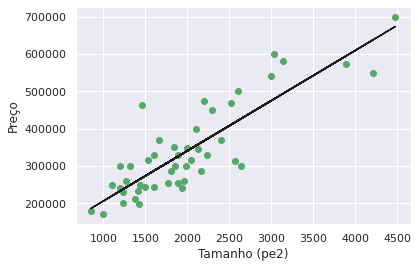

In [6]:
from matplotlib import pyplot as plt

plt.scatter(X, y,color='g')
plt.plot(X, reg.predict(X),color='k')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

Quando há mais de um atributo preditor, visualizar o modelo torna-se difícil, mas ainda é possível avaliar o modelo através do <b>erro quadrático (RSS)</b> ou a métrica <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html"><b>R^2</b></a>

In [7]:
from sklearn.metrics import r2_score
def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())
    
def calc_r2(y,predicted):
    return r2_score(predicted,y)

In [8]:
rss = calc_rss(y,reg.predict(X))
r2 = calc_r2(y,reg.predict(X))
print(rss)
print(r2)

193464477600.7059
0.6320180251851149


---

# Exercício 1
Treine modelos lineares na base <i>Portland_housePrices.csv</i> utilizando apenas um dos atributos preditores.

1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com <i>tamanho</i> ou com <i>número de quartos</i>?

2) O RSS e R^2 corroboram suas impressões observando o modelo?




## Regressão utilizando o **número de quartos**

In [11]:
X_q = dados_por.loc[:,['quartos']]
# y = dados_por.loc[:,['preco']]

reg = LinearRegression().fit(X_q,y)
reg

LinearRegression()

### Avaliando o modelo

Text(0, 0.5, 'Preço')

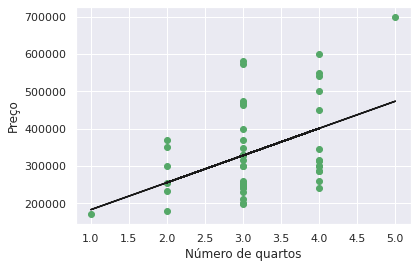

In [12]:
plt.scatter(X_q, y,color='g')
plt.plot(X_q, reg.predict(X_q),color='k')
plt.xlabel('Número de quartos')
plt.ylabel('Preço')

In [13]:
rss = calc_rss(y,reg.predict(X_q))
r2 = calc_r2(y,reg.predict(X_q))
print(rss)
print(r2)

578535325112.5249
-3.112607855431998


In [14]:
np.std(y)

preco    123702.536006
dtype: float64

### Lidando com outliers

In [15]:
dados_por_sem_out = dados_por.loc[(dados_por['quartos']>1) & (dados_por['quartos']<5)]

In [16]:
X_so = dados_por_sem_out.loc[:,['quartos']]
y_so = dados_por_sem_out.loc[:,['preco']]

reg = LinearRegression().fit(X_so,y_so)
reg

LinearRegression()

Text(0, 0.5, 'Preço')

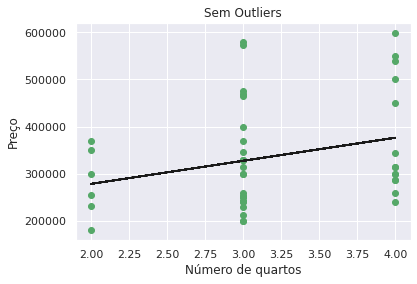

In [17]:
plt.scatter(X_so, y_so,color='g')
plt.plot(X_so, reg.predict(X_so),color='k')
plt.title('Sem Outliers')
plt.xlabel('Número de quartos')
plt.ylabel('Preço')

In [18]:
rss = calc_rss(y_so,reg.predict(X_so))
r2 = calc_r2(y_so,reg.predict(X_so))
print(rss)
print(r2)

515594475257.64
-10.582451836393671


In [19]:
np.std(y_so)

preco    111565.587699
dtype: float64

**Resposta:**  
Mesmo tirando os *outliers* o número de quartos não se mostra uma boa variável para perver os preços das casas. Na verdade, ele se torna ainda pior, comparado com os dados completos O fato dessa variável ser discreta, e não ter muita linearidade com relação ao preço a torna uma má preditora.

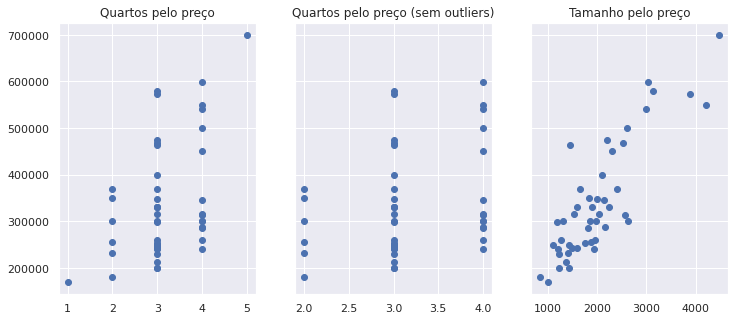

In [20]:
f, axs = plt.subplots(1, 3, sharey=True, figsize =(12,5))
axs[0].scatter(X_q['quartos'],y['preco'])
axs[0].set_title('Quartos pelo preço')
axs[1].scatter(X_so['quartos'],y_so['preco'])
axs[1].set_title('Quartos pelo preço (sem outliers)')
axs[2].scatter(X['tamanho'],y['preco'])
axs[2].set_title('Tamanho pelo preço')

plt.show()

---

# Exercício 2

Treine modelos lineares na base <i>Advertising.csv</i> utilizando apenas um dos atributos preditores.

1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com TV, radio ou newspaper?

2) Qual dos modelos é melhor? como você chegou a esta conclusão?

In [21]:
dados_adv.columns.tolist()

['TV', 'radio', 'newspaper', 'sales']

In [22]:
stat_df = pd.DataFrame(columns=['Mídia', 'RSS', 'R2'])

In [23]:
stat_df['Mídia'] = dados_adv.columns.tolist()[:3]

### Variável alvo

In [24]:
y = dados_adv.loc[:,['sales']]

## TV

In [25]:
X_TV = dados_adv.loc[:,['TV']]

reg = LinearRegression().fit(X_TV, y)
reg

LinearRegression()

### Avaliando o modelo

Text(0, 0.5, 'Vendas')

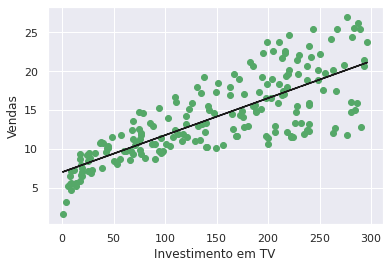

In [26]:
plt.scatter(X_TV, y,color='g')
plt.plot(X_TV, reg.predict(X_TV),color='k')
plt.xlabel('Investimento em TV')
plt.ylabel('Vendas')

In [27]:
rss = calc_rss(y,reg.predict(X_TV))
r2 = calc_r2(y,reg.predict(X_TV))
print(rss)
print(r2)

2102.5305831313512
0.3656794003764149


In [28]:
stat_df.loc[0:0,'RSS'] = rss

In [29]:
stat_df.loc[0:0,'R2'] = r2

## radio

In [30]:
X_radio = dados_adv.loc[:,['radio']]

reg = LinearRegression().fit(X_radio, y)
reg

LinearRegression()

### Avaliando o modelo

Text(0, 0.5, 'Vendas')

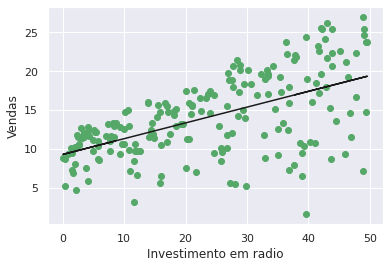

In [31]:
plt.scatter(X_radio, y,color='g')
plt.plot(X_radio, reg.predict(X_radio),color='k')
plt.xlabel('Investimento em radio')
plt.ylabel('Vendas')

In [32]:
rss = calc_rss(y,reg.predict(X_radio))
r2 = calc_r2(y,reg.predict(X_radio))
print(rss)
print(r2)

3618.479549025088
-1.0117537716572924


In [33]:
stat_df.loc[1:1,'RSS'] = rss
stat_df.loc[1:1,'R2'] = r2

## newspaper

In [34]:
X_newspaper = dados_adv.loc[:,['newspaper']]

reg = LinearRegression().fit(X_newspaper, y)
reg

LinearRegression()

### Avaliando o modelo

Text(0, 0.5, 'Vendas')

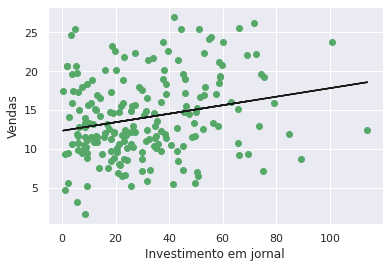

In [35]:
plt.scatter(X_newspaper, y,color='g')
plt.plot(X_newspaper, reg.predict(X_newspaper),color='k')
plt.xlabel('Investimento em jornal')
plt.ylabel('Vendas')

In [36]:
rss = calc_rss(y,reg.predict(X_newspaper))
r2 = calc_r2(y,reg.predict(X_newspaper))
print(rss)
print(r2)

5134.804544111939
-17.18632873290735


In [37]:
stat_df.loc[2:2,'RSS'] = rss
stat_df.loc[2:2,'R2'] = r2

In [38]:
stat_df

,Mídia,RSS,R2
0,TV,2102.530583,0.365679
1,radio,3618.479549,-1.011754
2,newspaper,5134.804544,-17.186329


**Resposta:**  
Como já se pode imaginar, a TV teve melhor correspondência nas predições das vendas, pois tem uma relação mais linear com a essa. Os jornais (newspaper), por outro lado, tem uma relação bem disperça e as predições usando essa variável não são muito confiáveis.

---

# Exercício 3

1. Compare os resultados das duas regressões com a implemtação do KNN-Regressor visto na aula passada.

1. Utilizando a API do scikit-learn para criação de partições de treino e teste, refaça a sua regressão nas partições de treino e faça a validação nas partições de teste.

    1. Comparar os resultados na partição de treino e teste;
    1. Comparar desempenho com a regressão na qual não foi feita a separação entre treino e teste. Você acha que o desempenho deveria ser melhor ou pior nesse caso? É possível dizer que os modelos treinados no dataset completo generalizam?
